In [105]:
# Package Imports

import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics, cross_validation
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools
import numpy as np
from  statsmodels.tsa.arima_model import ARIMA
from sklearn.neural_network import MLPClassifier
import warnings

In [2]:
# Reading csv in to pandas dataframe

def read_data():

    data = pd.read_csv('D:/E Drive/ASU Study/CSE575 Statistical Machine Learning/Hobby/AirPollution.csv')

    return data


In [3]:
def gaussianNB(features, labels):

    acc = []
    classifier = GaussianNB()
    predict = cross_validation.cross_val_predict(classifier, features, labels, cv=10)
    acc.append(metrics.accuracy_score(predict, labels))
    F1 = metrics.f1_score(labels, predict, average='micro')
    P = metrics.precision_score(labels, predict, average='micro')
    R = metrics.recall_score(labels, predict, average='micro')
    return (float(sum(acc) / len(acc)))*100, F1*100, P*100, R*100

In [4]:
def DT(features, labels):

    acc = []
    classifier = DecisionTreeClassifier()
    predict = cross_validation.cross_val_predict(classifier, features, labels, cv=10)
    acc.append(metrics.accuracy_score(predict, labels))
    F1 = metrics.f1_score(labels, predict, average='micro')
    P = metrics.precision_score(labels, predict, average='micro')
    R = metrics.recall_score(labels, predict, average='micro')
    return (float(sum(acc) / len(acc)))*100, F1*100, P*100, R*100

In [80]:
def NN(features, labels):
   
    acc = []
    classifier = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
    predict = cross_validation.cross_val_predict(classifier, features, labels, cv=10)
    acc.append(metrics.accuracy_score(predict, labels))
    F1 = metrics.f1_score(labels, predict, average='micro')
    P = metrics.precision_score(labels, predict, average='micro')
    R = metrics.recall_score(labels, predict, average='micro')
    return (float(sum(acc) / len(acc)))*100, F1*100, P*100, R*100
    

In [64]:
def SVM(feature, labels):

    acc = []
    SVM = SVC(C=0.1, kernel='linear')
    predict = cross_validation.cross_val_predict(SVM, features, labels,cv=10)
    acc.append(accuracy_score(predict, labels))
    acc.append(metrics.accuracy_score(predict, labels))
    F1 = metrics.f1_score(labels, predict, average='micro')
    P = metrics.precision_score(labels, predict, average='micro')
    R = metrics.recall_score(labels, predict, average='micro')
    return (float(sum(acc) / len(acc)))*100, F1*100, P*100, R*100

In [77]:
def pm_classification(data):

    good = []
    moderate = []
    unhealthysg = []
    unhealthy = []
    pm_labels = []
    bad_values = []
    pm_list = data['pm2.5']

    for i, value in enumerate(pm_list):

        if math.isnan(value):
            #del pm_list[i]
            bad_values.append(i)
        elif (value > 0 and value <= 50):
            good.append(i)
            pm_labels.append(0)
        elif (value > 50 and value <= 100):
            moderate.append(i)
            pm_labels.append(1)
        elif (value > 100 and value <= 150):
            unhealthysg.append(i)
            pm_labels.append(2)
        else:
            unhealthy.append(i)
            pm_labels.append(3)


    data.drop(data.index[bad_values], inplace=True)
    features = data[['Iws', 'TEMP', 'PRES', 'Is', 'Ir', 'cbwd', 'DEWP', 'hour', 'month', 'day', 'year']].copy()

    return features, pm_labels

In [6]:
def ar1(phi=0.9, n=1000, init=0):
    time_series = [init]
    error = np.random.rand(n)
    for period in range(n):
        time_series.append(error[period]+phi*time_series[-1])
    return pd.Series(time_series[1:], index=range(n))


def ar2(phi1=0.9, phi2=-0.8, n=1000, init=0):
    time_series = [init, init]
    error = np.random.rand(n)
    for period in range(2, n):
        time_series.append(error[period]+phi1*time_series[-1]+phi2*time_series[-2])
    return pd.Series(time_series[1:], index=range(1,n))

In [7]:
def MA1(theta=0.5, n=100):
    time_series = []
    error=np.random.rand(n)
    for period in range(1,n):
        time_series.append(error[period]+ theta*error[period-1])
    return pd.Series(time_series[1:], index=range(1, n-1))

In [67]:
def yearly_analysis(data_partial):
    data_partial = data_partial[data_partial['pm2.5'] > 150]
    data_plot = data_partial[['pm2.5', 'DEWP', 'TEMP', 'Ir']]
    data_plot.cumsum()
    data_plot.plot()
    plt.show()

In [92]:
    # ARIMA model
    def ARIMA_test(data_partial, p, d, q):
        data_partial['pm2.5'].dropna(inplace=True)
        model = ARIMA(data_partial['pm2.5'], order=(p,d,q))
        result_AR = model.fit(disp=-1)
        plt.plot(log_temp_diff)
        plt.title('Original PM2.5 Data')
        plt.show()
        plt.plot(result_AR.fittedvalues, color='red')
        plt.title('Predicted PM2.5 Data')
        plt.show()

In [101]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    timeseries = timeseries['pm2.5']
    timeseries.dropna(inplace=True)
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

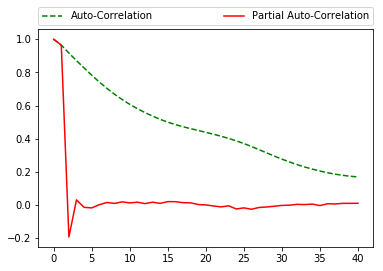

In [114]:
if __name__ == "__main__":

    # Read Data and convert the columns to DateTime index
    warnings.filterwarnings('once')
    data = read_data()
    date_time = pd.DataFrame(pd.to_datetime(data[['year', 'month', 'day', 'hour']]))
    data = pd.concat([date_time, data], axis=1)
    #data = data.drop(['year', 'No', 'month', 'day', 'hour'], axis=1)
    data.columns.values[0]='Time'
    data.set_index(['Time'], inplace=True)

    # Drop Wind Direction values
    data = data.replace('cv', 0)
    data = data.replace('NW', 1)
    data = data.replace('NE', 2)
    data = data.replace('SE', 3)
    
    # Drop NaN Values from PM2.5 Data
    data['pm2.5'].dropna(inplace=True)

    # Generate Auto-Correlation and Partial Auto-Correlation Graphs

    acf_results = statsmodels.tsa.stattools.acf(data['pm2.5'])
    pacf_results = statsmodels.tsa.stattools.pacf(data['pm2.5'])

    plt.plot(acf_results, color='green', label='Auto-Correlation', linestyle='--')
    plt.plot(pacf_results, color='red', label='Partial Auto-Correlation')

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)

    plt.show()

In [117]:
    # Consider data for the year 2010 only

    data_partial = data['2010']
    warnings.filterwarnings('ignore')
    # Data differencing example for introducing Stationarity

    log_temp = np.log(data_partial['pm2.5'])
    log_temp_diff = log_temp - log_temp.shift()
    # log_temp_diff.plot()

    # Remove NaN values

    log_temp_diff.dropna(inplace=True)
    
    
    features, pm_labels = pm_classification(data_partial)

    acc_NB, F_NB, precision_NB, recall_NB = gaussianNB(features, pm_labels)
    acc_DT, F_DT, precision_DT, recall_DT = DT(features, pm_labels)
    #acc_SVM, F_SVM, precision_SVM, recall_SVM = SVM(features, pm_labels)
    acc_NN, F_NN, precision_NN, recall_NN = NN(features, pm_labels)
    print("Naive Bayes Results: accuracy, F1-Score, Precision and Recall", acc_NB, F_NB, precision_NB, recall_NB)
    print("Decision Tree Results: accuracy, F1-Score, Precision and Recall", acc_DT, F_DT,precision_DT, recall_DT)
    print("Decision Tree Results: accuracy, F1-Score, Precision and Recall", acc_NN, F_NN,precision_NN, recall_NN)
    
    #print("SVM Results: accuracy, F1-Score, Precision and Recall", acc_SVM, F_SVM,precision_SVM, recall_SVM)
  

Naive Bayes Results: accuracy, F1-Score, Precision and Recall 39.414163885799034 39.414163885799034 39.414163885799034 39.414163885799034
Decision Tree Results: accuracy, F1-Score, Precision and Recall 25.53454455567915 25.53454455567915 25.53454455567915 25.53454455567915
Decision Tree Results: accuracy, F1-Score, Precision and Recall 32.96255098257323 32.96255098257323 32.96255098257323 32.96255098257323


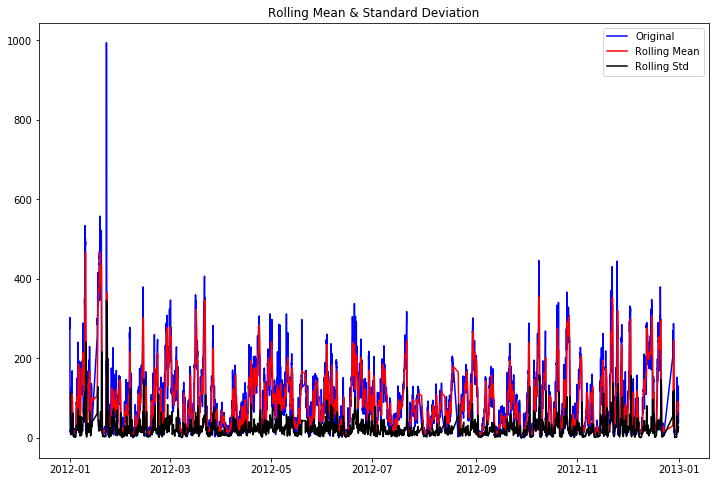

Results of Dickey-Fuller Test:
Test Statistic                -1.178674e+01
p-value                        1.004631e-21
#Lags Used                     2.000000e+01
Number of Observations Used    8.274000e+03
Critical Value (10%)          -2.566956e+00
Critical Value (1%)           -3.431141e+00
Critical Value (5%)           -2.861889e+00
dtype: float64


In [118]:
    test_stationarity(data['2012'])

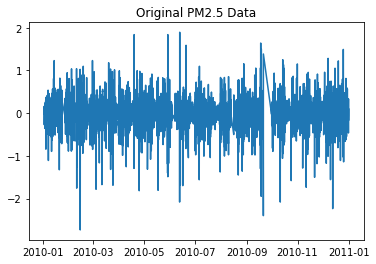

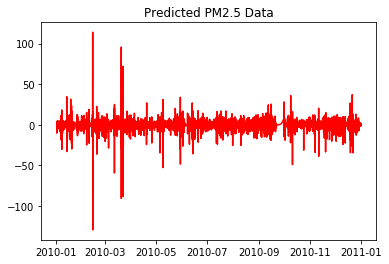

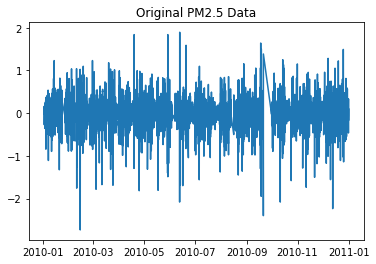

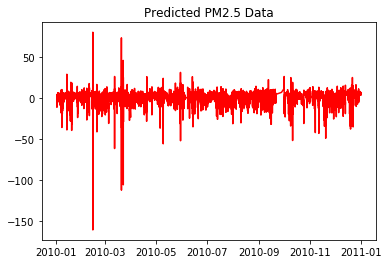

In [122]:
    ARIMA_test(data_partial, 1, 1, 1)
    ARIMA_test(data_partial, 2, 1, 2)

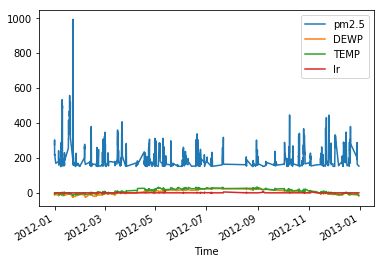

In [121]:
    yearly_analysis(data['2012'])